In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('social.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       207 non-null    object 
 1   Urbanization_Rate             207 non-null    float64
 2   Rural_Population_Growth       207 non-null    float64
 3   Employment_In_Agriculture     207 non-null    float64
 4   Population_Ages_65_and_above  207 non-null    float64
 5   Population_Ages_0_14          207 non-null    float64
 6   Age_Dependency_Ratio          207 non-null    float64
 7   Women_In_Parliament           207 non-null    float64
 8   Female_Labor_Participation    207 non-null    float64
 9   Access_to_Electricity         207 non-null    float64
 10  Mobile_Subscriptions          207 non-null    float64
 11  Intentional_Homicides         207 non-null    float64
 12  Category                      207 non-null    object 
dtypes: fl

In [4]:
X = df.drop(columns=['country','Category'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Urbanization_Rate             207 non-null    float64
 1   Rural_Population_Growth       207 non-null    float64
 2   Employment_In_Agriculture     207 non-null    float64
 3   Population_Ages_65_and_above  207 non-null    float64
 4   Population_Ages_0_14          207 non-null    float64
 5   Age_Dependency_Ratio          207 non-null    float64
 6   Women_In_Parliament           207 non-null    float64
 7   Female_Labor_Participation    207 non-null    float64
 8   Access_to_Electricity         207 non-null    float64
 9   Mobile_Subscriptions          207 non-null    float64
 10  Intentional_Homicides         207 non-null    float64
dtypes: float64(11)
memory usage: 17.9 KB


In [5]:
X = X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Urbanization_Rate             207 non-null    float64
 1   Rural_Population_Growth       207 non-null    float64
 2   Employment_In_Agriculture     207 non-null    float64
 3   Population_Ages_65_and_above  207 non-null    float64
 4   Population_Ages_0_14          207 non-null    float64
 5   Age_Dependency_Ratio          207 non-null    float64
 6   Women_In_Parliament           207 non-null    float64
 7   Female_Labor_Participation    207 non-null    float64
 8   Access_to_Electricity         207 non-null    float64
 9   Mobile_Subscriptions          207 non-null    float64
 10  Intentional_Homicides         207 non-null    float64
dtypes: float64(11)
memory usage: 17.9 KB


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [8]:
df.loc[X.index, 'Cluster_ID'] = clusters

In [9]:
means = df.groupby('Cluster_ID')[X.columns].mean()

In [10]:
nazwy_klastrow = {
    0: 'Developed',
    1: 'Developing',
    2: 'Struggling'
}

df['Cluster_Name'] = df['Cluster_ID'].map(nazwy_klastrow)
df.to_csv('social_clustered_final.csv', index=False)

C:\Users\Dawid\AppData\Local\Temp\ipykernel_25476\451143003.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wpływ (%)', y='Cecha', data=importance_df, palette='viridis')


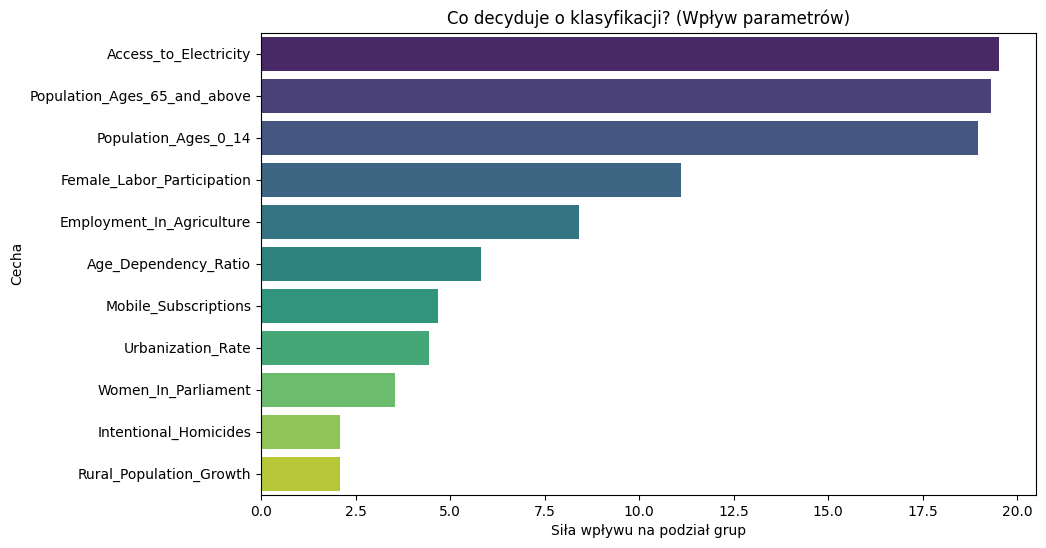

Najważniejsze 3 cechy to:
                          Cecha  Wpływ (%)
8         Access_to_Electricity  19.524614
3  Population_Ages_65_and_above  19.298200
4          Population_Ages_0_14  18.977673


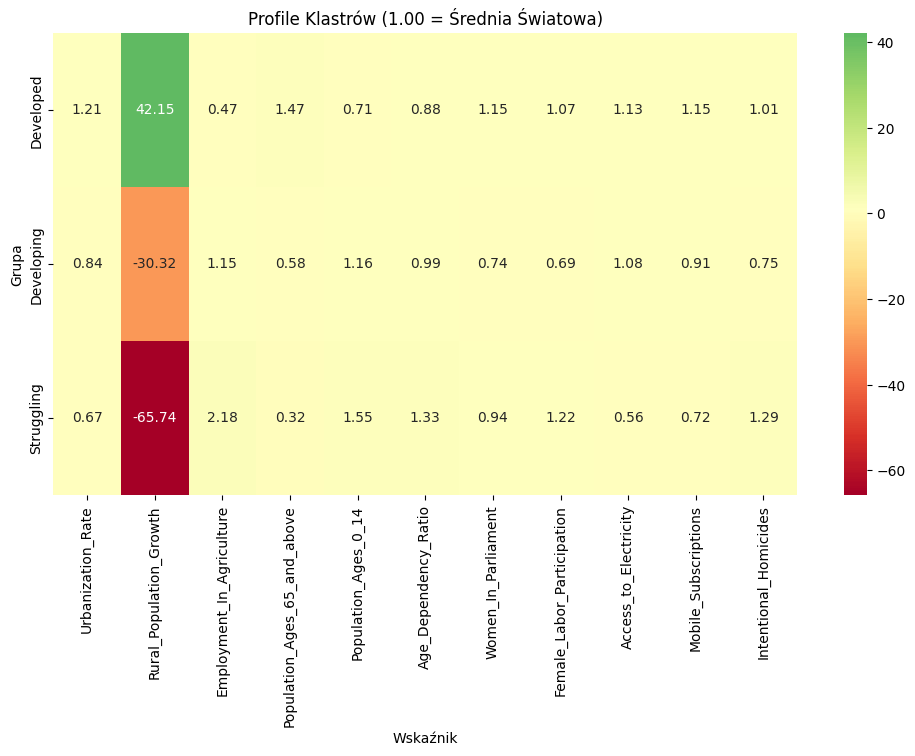

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

features = [
    'Urbanization_Rate',
    'Rural_Population_Growth',
    'Employment_In_Agriculture',
    'Population_Ages_65_and_above',
    'Population_Ages_0_14',
    'Age_Dependency_Ratio',
    'Women_In_Parliament',
    'Female_Labor_Participation',
    'Access_to_Electricity',
    'Mobile_Subscriptions',
    'Intentional_Homicides'
]
# --- KONFIGURACJA ---
# Upewnij się, że masz te zmienne z poprzednich kroków:
# df - Twoja główna tabela
# features - lista kolumn użytych do klastrowania
# 'Cluster_Name' - kolumna z nazwami grup

# 1. KTÓRE PARAMETRY SĄ NAJWAŻNIEJSZE? (Feature Importance)
# Trenujemy szybki model klasyfikacji, żeby "zrozumiał", jak powstały klastry
X = df[features].fillna(0)
y = df['Cluster_ID'] # Używamy ID, bo jest cyfrą

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Tworzymy tabelę ważności
importance_df = pd.DataFrame({
    'Cecha': features,
    'Wpływ (%)': rf.feature_importances_ * 100
}).sort_values(by='Wpływ (%)', ascending=False)

# Rysujemy wykres
plt.figure(figsize=(10, 6))
sns.barplot(x='Wpływ (%)', y='Cecha', data=importance_df, palette='viridis')
plt.title('Co decyduje o klasyfikacji? (Wpływ parametrów)')
plt.xlabel('Siła wpływu na podział grup')
plt.show()

print("Najważniejsze 3 cechy to:")
print(importance_df.head(3))


# 2. PROFILOWANIE KLASTRÓW (Heatmapa - Jak bardzo różnią się od średniej?)
# Obliczamy średnie dla każdej grupy
cluster_means = df.groupby('Cluster_Name')[features].mean()

# Obliczamy średnią globalną (dla całego świata)
global_means = df[features].mean()

# Obliczamy różnicę w procentach (np. 1.5 oznacza 150% średniej światowej)
# To pozwala porównać ze sobą różne jednostki (dolary, procenty, lata)
relative_profile = cluster_means / global_means

# Rysujemy Heatmapę
plt.figure(figsize=(12, 6))
sns.heatmap(relative_profile, annot=True, fmt=".2f", cmap="RdYlGn", center=1)
plt.title('Profile Klastrów (1.00 = Średnia Światowa)')
plt.ylabel('Grupa')
plt.xlabel('Wskaźnik')
plt.show()